In [194]:
#include some libraries
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
from numpy import linalg




In [195]:
#first, a function for visualizing data
def plotData(x, y):
    plt.figure()
    plt.xlabel('Population of city in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.title('Scatter plot of training data using plotData(x, y)')
    plt.scatter(x, y)

    plt.show()    


In [196]:
#second, a function for estimating parameters of a linear model y = w0 + w1 x
#reference for linear algebra with numpy:
#https://docs.scipy.org/doc/numpy/reference/routines.linalg.html#solving-equations-and-inverting-matrices

def LinearReg(x, y):
    c2 = np.ones(shape = x.shape)
    A = np.ones(shape = [x.size, 2])

    w = np.zeros(shape = [2, 1])

    A[:,0] = x
    A[:,1] = c2

    w = linalg.lstsq(A, y)[0]

    return (w)
    

In [197]:
def predictProfit(w, x):
    X = [x, 1]
    y = np.dot(X, w)
    return(y)

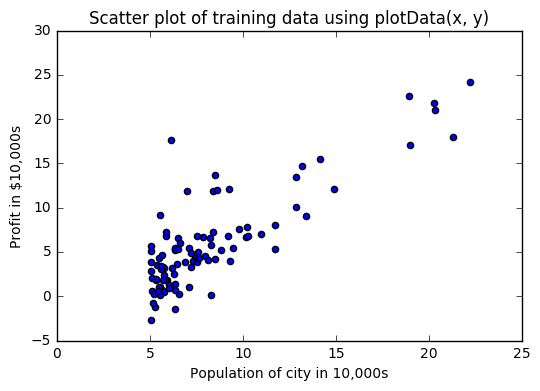

In [198]:
#READ DATA1 FILE AND DISPLAY DATA USING SCATTER PLOT

#read the text file lab1data1.txt
data_mat = np.loadtxt("lab1data1.txt", delimiter= ",")

#unpack the columns into variables x and y
x = data_mat[:,0]
y = data_mat[:,1]

#pass x and y to plotting function for display
plotData(x, y)


In [199]:
#Use linear regression to find model parameters with the data in data1 file
w = LinearReg(x, y)

#now, make predictions on profit for two populations 
pop1 = 35000
pop2 = 70000

profit1 = predictProfit(w, pop1)
print profit1

41752.2817658
